[0, 14.485, 28.66, 40.26, 51.225, 60.545, 68.15, 74.73, 80.65, 86.7, 92.015, 97.065, 101.32, 105.215, 109.36, 112.93, 116.035, 119.125, 122.525, 125.485, 128.635, 131.43, 134.46, 137.76, 140.36, 142.75, 145.535, 148.0, 150.435, 152.735, 155.11, 157.395, 159.815, 162.09, 164.285, 166.43, 168.46, 170.595, 172.555, 174.635, 176.52, 178.415, 180.44, 182.43, 184.29, 186.11, 187.985, 189.795, 191.695, 193.38, 195.22, 197.14, 198.83, 200.565, 202.325, 204.18, 205.82, 207.575, 209.315, 211.06, 212.825, 214.465, 216.13, 217.8, 219.505, 221.18, 222.855, 224.445, 226.0, 227.505, 229.04, 230.505, 231.99, 233.42, 234.885, 236.54, 238.125, 239.65, 241.015, 242.33, 243.86, 245.27, 246.805, 248.215, 249.655, 251.1, 252.485, 254.085, 255.48, 257.17, 258.715, 260.02, 261.42, 262.86, 264.34, 265.685, 267.07, 268.31, 269.805, 271.245, 272.615, 274.005, 275.385, 276.7, 278.06, 279.48, 280.86, 282.295, 283.605, 285.065, 286.395, 287.63, 288.945, 290.305, 291.61, 292.945, 294.175, 295.455, 296.735, 297.805, 

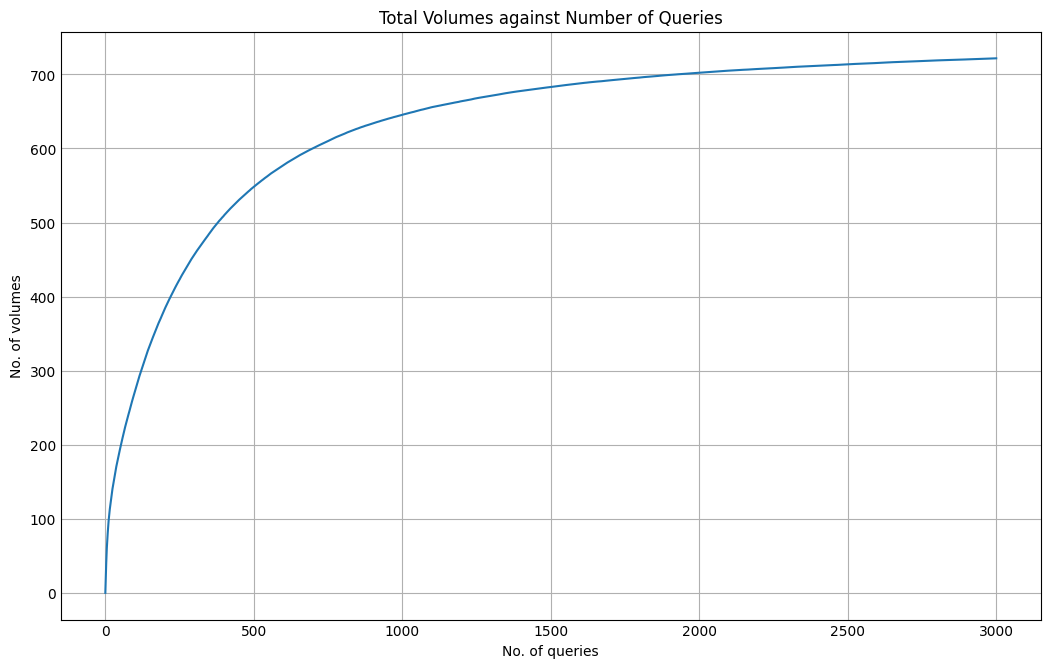

In [ ]:
import math 
import random 
import matplotlib.pyplot as plt 

RSEmax = 256

query_range_list = []
for i in range (RSEmax):
    for j in range (i+1):
        query_range_list.append(j)

def query_gen():
    no_range = random.choice(query_range_list)

    first_int = random.randint(1, RSEmax-no_range)
    query = (first_int, first_int+no_range)
    return(query)


def cover_log(start_int, end_int):
    c = 0
    query_list = []
    while start_int <= end_int:
        c = start_int
        for i in range(2, int(math.log(RSEmax, 2))+1):
            if end_int == start_int + 1:
                c = end_int
                break
            if start_int % 2 == 0:
                if end_int - start_int < 4:
                    c = start_int + 1
                    break
                else:
                    c = start_int
                    break
            if start_int + (2**i -1) > end_int:
                break
            else:    
                c = start_int + (2**i -1)
            if start_int % 2**(i-1) != 1:
                c = start_int + (2**(i-1) -1)
                break   
      
        node = (start_int, c)
        query_list.append(node)
        start_int = c+1
    return query_list

max_volumes = 3*RSEmax - (math.log(RSEmax, 2)+2)
no_of_runs = 200
no_of_queries = 3000
def log_query(no_of_runs,no_of_queries):
    arr = [0 for i in range(no_of_queries+1)]
    for h in range(no_of_runs):
        vol_tracker = []
        vol_sum = 0
        query_tracker = []
        for j in range(no_of_queries):
            query_asked = query_gen()
            if len(vol_tracker) == max_volumes: 
                for i in range(max_volumes, no_of_queries):
                    arr[i+1] = max_volumes*no_of_runs
                break   
            if len(query_tracker) == int((RSEmax*(RSEmax + 1))/2):
                for i in range(int((RSEmax*(RSEmax + 1))/2), no_of_queries):
                    arr[i+1] = max_volumes*no_of_runs
                break   
            while query_asked in query_tracker:
                query_asked = query_gen()
            else:
                query_tracker.append(query_asked)
                (a,b) = query_asked
                query_list = cover_log(a,b)
                for i in query_list:
                    if i not in vol_tracker:
                        vol_tracker.append(i)
                        vol_sum +=1
                arr[j+1] = arr[j+1] + vol_sum
                
    for i in range(no_of_queries):
        arr[i+1] = arr[i+1] /no_of_runs
    print(arr)
    return(arr)

arr = log_query(no_of_runs,no_of_queries) 

plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,6))
plt.plot(arr)
plt.xlabel("No. of queries")  
plt.ylabel("No. of volumes")  
plt.title("Total Volumes against Number of Queries")  
plt.show()